In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('Absenteeism_Atwork_dataset.csv')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
#number of rows and columns
df.shape

(740, 21)

In [4]:
#column names
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
df.columns=df.columns.str.replace(' ','')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           740 non-null    int64  
 1   Reasonforabsence             740 non-null    int64  
 2   Monthofabsence               740 non-null    int64  
 3   Dayoftheweek                 740 non-null    int64  
 4   Seasons                      740 non-null    int64  
 5   Transportationexpense        740 non-null    int64  
 6   DistancefromResidencetoWork  740 non-null    int64  
 7   Servicetime                  740 non-null    int64  
 8   Age                          740 non-null    int64  
 9   WorkloadAverage/day          740 non-null    float64
 10  Hittarget                    740 non-null    int64  
 11  Disciplinaryfailure          740 non-null    int64  
 12  Education                    740 non-null    int64  
 13  Son                 

In [7]:
df.describe()

,ID,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,...,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Weight,Height,Bodymassindex,Absenteeismtimeinhours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
df.nunique()

ID                             36
Reasonforabsence               28
Monthofabsence                 13
Dayoftheweek                    5
Seasons                         4
Transportationexpense          24
DistancefromResidencetoWork    25
Servicetime                    18
Age                            22
WorkloadAverage/day            38
Hittarget                      13
Disciplinaryfailure             2
Education                       4
Son                             5
Socialdrinker                   2
Socialsmoker                    2
Pet                             6
Weight                         26
Height                         14
Bodymassindex                  17
Absenteeismtimeinhours         19
dtype: int64

In [9]:
df['ID'].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [10]:
df['Absenteeismtimeinhours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeismtimeinhours, dtype: int64

In [11]:
for i in df.columns:
    print(i,'-',len(df[i].value_counts()))

ID - 36
Reasonforabsence - 28
Monthofabsence - 13
Dayoftheweek - 5
Seasons - 4
Transportationexpense - 24
DistancefromResidencetoWork - 25
Servicetime - 18
Age - 22
WorkloadAverage/day - 38
Hittarget - 13
Disciplinaryfailure - 2
Education - 4
Son - 5
Socialdrinker - 2
Socialsmoker - 2
Pet - 6
Weight - 26
Height - 14
Bodymassindex - 17
Absenteeismtimeinhours - 19


In [12]:
#Checking null values

df.isna().sum()

ID                             0
Reasonforabsence               0
Monthofabsence                 0
Dayoftheweek                   0
Seasons                        0
Transportationexpense          0
DistancefromResidencetoWork    0
Servicetime                    0
Age                            0
WorkloadAverage/day            0
Hittarget                      0
Disciplinaryfailure            0
Education                      0
Son                            0
Socialdrinker                  0
Socialsmoker                   0
Pet                            0
Weight                         0
Height                         0
Bodymassindex                  0
Absenteeismtimeinhours         0
dtype: int64

In [13]:
# categorising the variables 
continuous_data = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_data = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']


# Exploratory Data analysis

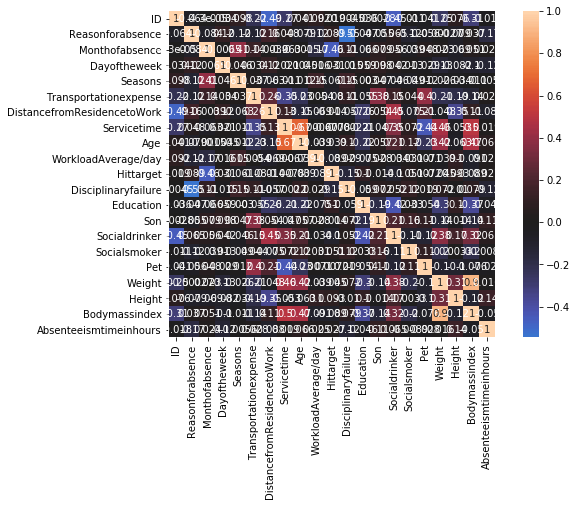

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,square=True,center=0)
plt.show()

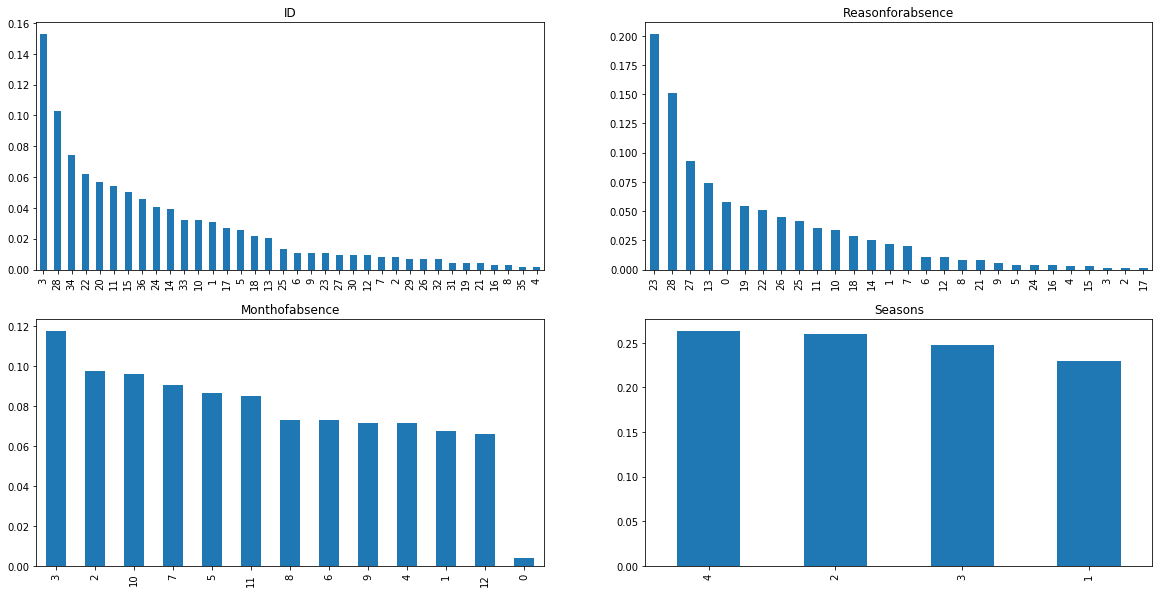

In [15]:
plt.figure(1)
plt.subplot(221)
df['ID'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'ID')

plt.subplot(222)
df['Reasonforabsence'].value_counts(normalize=True).plot.bar(title= 'Reasonforabsence')

plt.subplot(223)
df['Monthofabsence'].value_counts(normalize=True).plot.bar(title= 'Monthofabsence')

plt.subplot(224)
df['Seasons'].value_counts(normalize=True).plot.bar(title= 'Seasons')

plt.show()

In [16]:
df['Absenteeismtimeinhours'].dropna().mean()

6.924324324324324

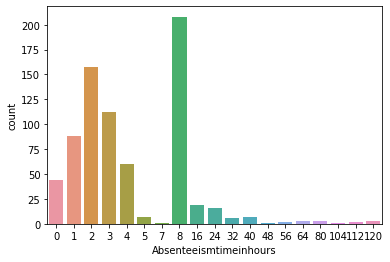

In [17]:
sns.countplot(x='Absenteeismtimeinhours',data=df)

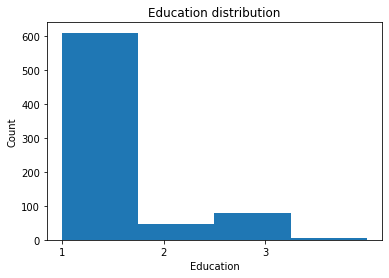

In [18]:
plt.hist(df['Education'].dropna(),bins=4)
plt.xticks(range(1,4))
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education distribution')
plt.show()

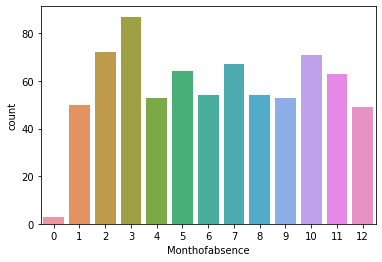

In [19]:
sns.countplot(x='Monthofabsence',data=df)

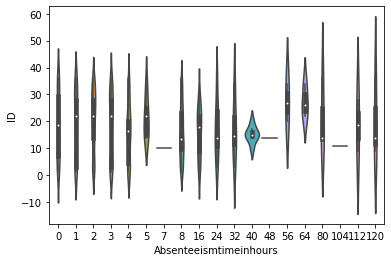

In [20]:
sns.violinplot(x="Absenteeismtimeinhours", y="ID", data=df);

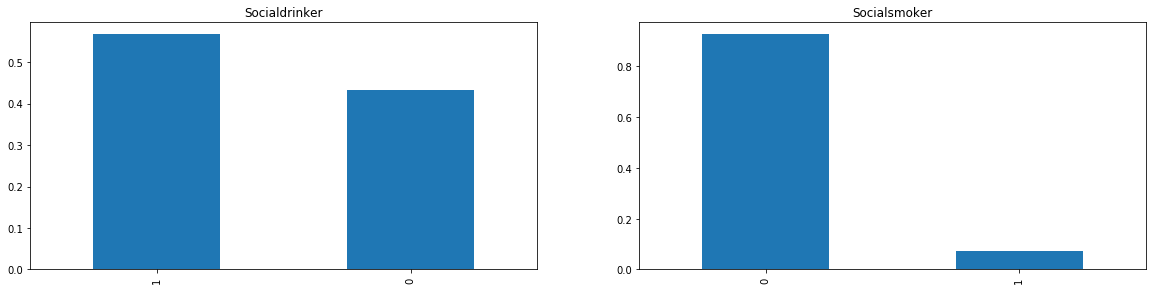

In [21]:
plt.figure(1)
plt.subplot(221)
df['Socialdrinker'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Socialdrinker')

plt.subplot(222)
df['Socialsmoker'].value_counts(normalize=True).plot.bar(title= 'Socialsmoker')

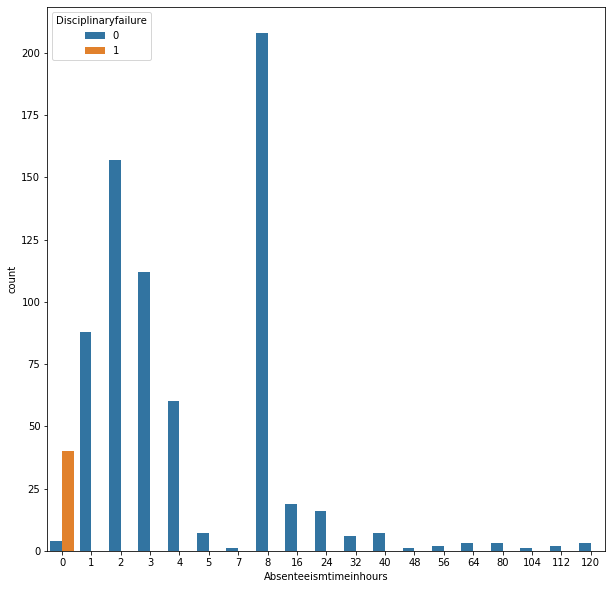

In [22]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='Absenteeismtimeinhours',hue='Disciplinaryfailure',data=df)

Text(0, 0.5, 'Absenteeisminhours')

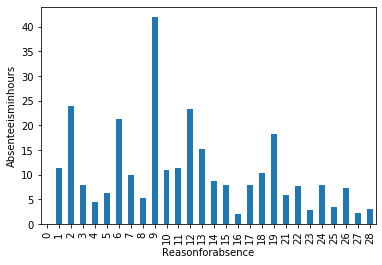

In [23]:
df.groupby('Reasonforabsence').mean()['Absenteeismtimeinhours'].plot.bar()
plt.ylabel('Absenteeisminhours')

Text(0, 0.5, 'Absenteeism in hours')

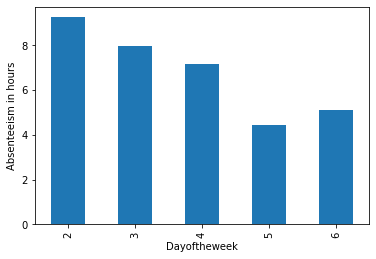

In [24]:
df.groupby(['Dayoftheweek']).mean()['Absenteeismtimeinhours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

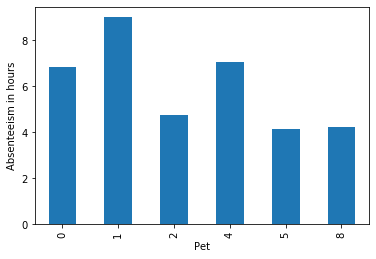

In [25]:
df.groupby([categorical_data[9]]).mean()['Absenteeismtimeinhours'].plot.bar()
plt.ylabel('Absenteeism in hours')

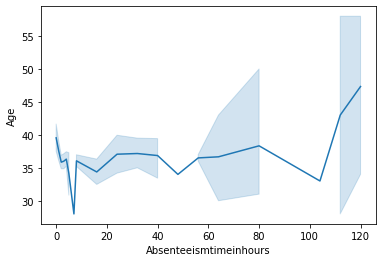

In [26]:
sns.lineplot(x="Absenteeismtimeinhours",y="Age",data=df)
plt.show()

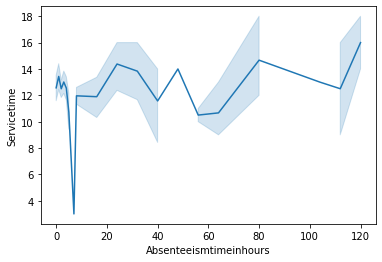

In [27]:
sns.lineplot(x="Absenteeismtimeinhours",y="Servicetime",data=df)
plt.show()

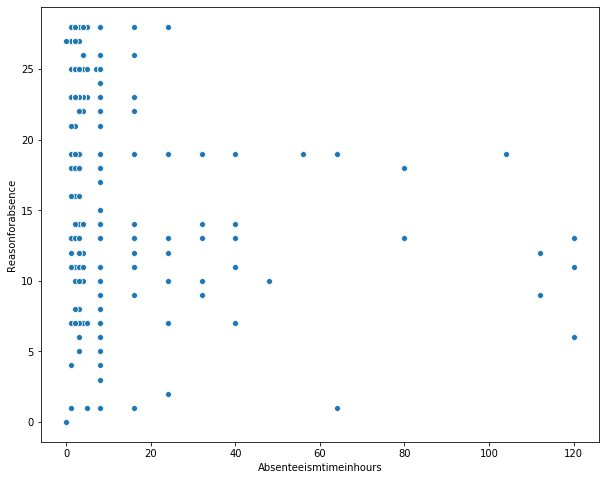

In [28]:
plt.figure(figsize=(10,8))
plt.xlabel("Absenteeismtimeinhours")
plt.ylabel("Reasonforabsence")
sns.scatterplot(x='Absenteeismtimeinhours',y='Reasonforabsence',data=df)

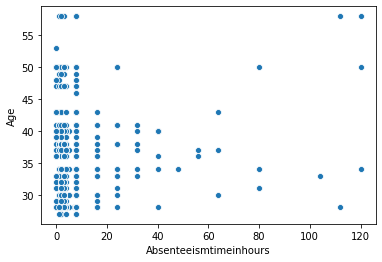

In [29]:
sns.scatterplot(x='Absenteeismtimeinhours',y='Age',data=df)

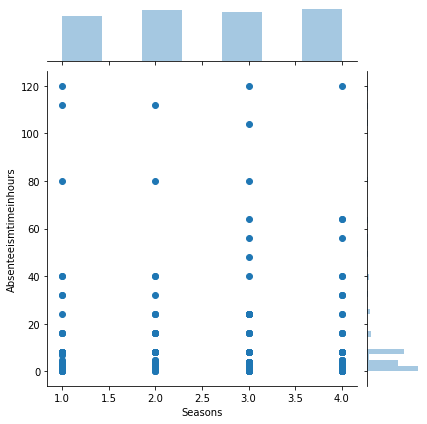

In [30]:
sns.jointplot(x='Seasons',y='Absenteeismtimeinhours',data=df)

<Figure size 720x432 with 0 Axes>

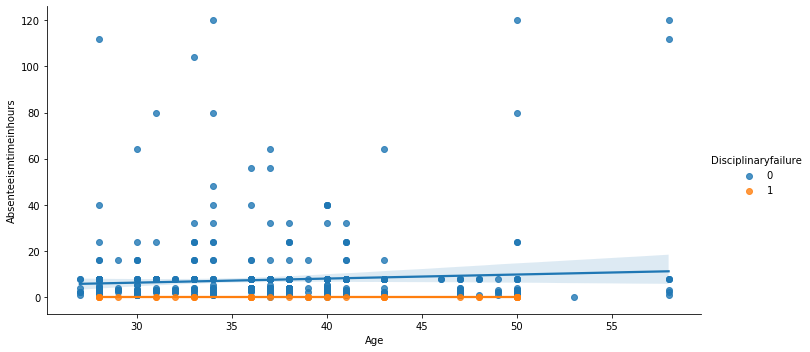

In [31]:
plt.figure(figsize=(10,6))
sns.lmplot(x='Age',y='Absenteeismtimeinhours',data=df,hue='Disciplinaryfailure',size=5,aspect=2)

<Figure size 720x432 with 0 Axes>

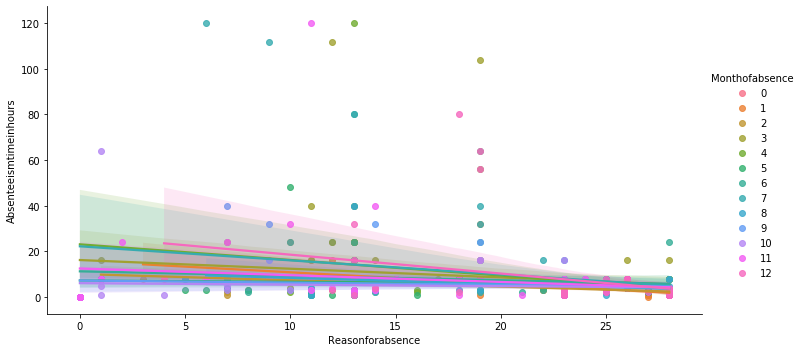

In [32]:
plt.figure(figsize=(10,6))
sns.lmplot(x='Reasonforabsence',y='Absenteeismtimeinhours',data=df,hue='Monthofabsence',size=5,aspect=2)

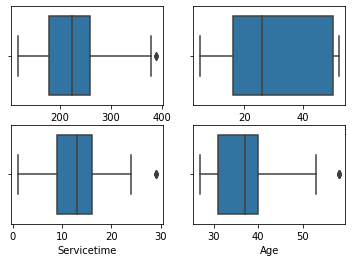

In [33]:
#checking outlier
plt.figure(1)
plt.subplot(221)
sns.boxplot(df['Transportationexpense'])

plt.subplot(222)
sns.boxplot(df['DistancefromResidencetoWork'])

plt.subplot(223)
sns.boxplot(df['Servicetime'])

plt.subplot(224)
sns.boxplot(df['Age'])

In [34]:
x= df.drop('Absenteeismtimeinhours',axis=1)
y=df['Absenteeismtimeinhours']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [36]:
(x_train.shape),(y_train.shape)

((518, 20), (518,))

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

MAE: 6.80727709895354
MSE: 253.752216852427
RMSE: 15.92960190502032


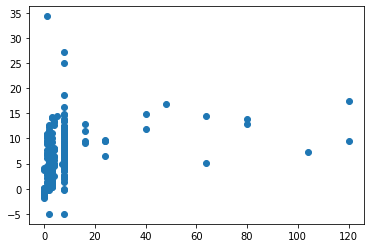

In [38]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

MAE: 8.386636636636636
MSE: 432.47685185185185
RMSE: 20.79607779971627


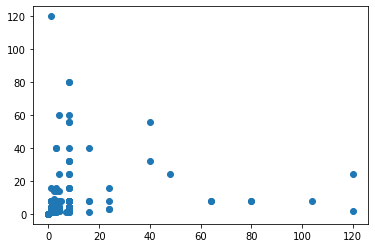

In [39]:
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
pred=dr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

MAE: 7.1136139711139705
MSE: 284.4565472647591
RMSE: 16.865839654898867


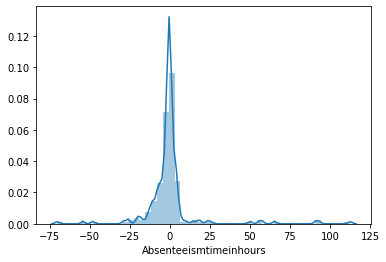

In [40]:
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
sns.distplot((y_test-pred),bins=50)

MAE: 6.931110553552576
MSE: 289.4278302006677
RMSE: 17.012578587641194


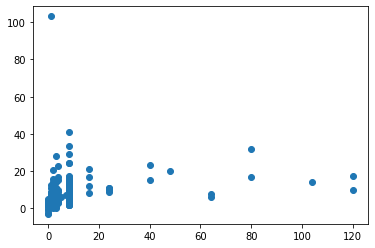

In [41]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,25)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 24}

In [43]:
print(lr.intercept_)
print(lr.coef_)

6.469111969111974
[ -2.87966044  -3.92551251   0.52651051  -1.11016608  -0.21576101
  -0.06916274  -0.51772348  -1.38317879   3.130683     0.10454886
  -0.16786899  -3.88461198  -2.17225466   0.66416608  -1.30502384
  -0.79769554  -0.76270994   8.61448846  -2.97167271 -10.93315451]


In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=8,scoring="r2").mean()

0.08781534103486889

In [45]:
from sklearn.externals import joblib
joblib.dump(lr,'Absenteeism_Atwork_dataset.obj')

['Absenteeism_Atwork_dataset.obj']